In [1]:
import pandas as pd
import numpy as np
import collections
import copy
import random
import re
import matplotlib.pyplot as plt
from nlp.preprocessing import (
    clean_text,
    preprocess,
    tokenize,
    preprocess_document,
    tokenize_document,
    get_stopwords, 
    lemmatization_document,
    get_canonical_words)
from nlp.utils import (
    plot_histogram,
    get_completetext,
    plot_wordcloud,
    print_statistics,
    groups_frequency_sort)
from nlp.text_statistics import (
    count_tokens,
    unique_tokens
)
from nlp.grouping import (
    get_groups,
    get_groups_size,
    get_unigram_groups,
    get_two_tokens_groups,
    get_first_token_groups,
    get_bigram_groups,
    get_first_two_groups,
    groups_frequency_sort
)
from utils.read_files import (
    get_items)
from item.item_list import (
    ItemList,
    Item
)
from item.spellcheckeropt import SpellcheckerOpt
from item.utils import get_tokens_set
from textpp_ptbr.preprocessing import TextPreProcessing as tpp
from gensim.parsing.preprocessing import (
    strip_multiple_whitespaces,
    strip_non_alphanum,
    strip_punctuation2,
    strip_short)

In [2]:
itemlist = ItemList()
itemlist.load_items_from_file('../dados/items_preprocessed_v3_train.zip')

In [3]:
len(itemlist.items_list)

1195143

In [4]:
items_list = itemlist.items_list

In [5]:
items_list[151029].print_item()

{'palavras': ['sabao'], 'unidades_medida': ['gr'], 'números': ['500'], 'cores': [], 'materiais': [], 'tamanho': [], 'quantidade': ['po'], 'preço': 3.99, 'dsc_unidade_medida': 'caixa', 'original': None, 'licitação': 1136017, 'original_prep': ['sabao', 'po', '500', 'gr']}


In [6]:
first_token_groups = itemlist.get_first_token_groups()

In [7]:
len(first_token_groups)

13498

In [8]:
groups = list(first_token_groups.keys())

In [9]:
groups[:10]

['colagenase',
 'campo',
 'pet',
 'tinta',
 'termometro',
 'diclofenaco',
 'panfleto',
 'bota',
 'ciprofloxacino',
 'dea']

In [10]:
firstt_groups_size = itemlist.get_groups_size(first_token_groups)

In [11]:
items_group_size = []

for group_size in firstt_groups_size:
    for i in range(group_size):
        items_group_size.append(group_size)

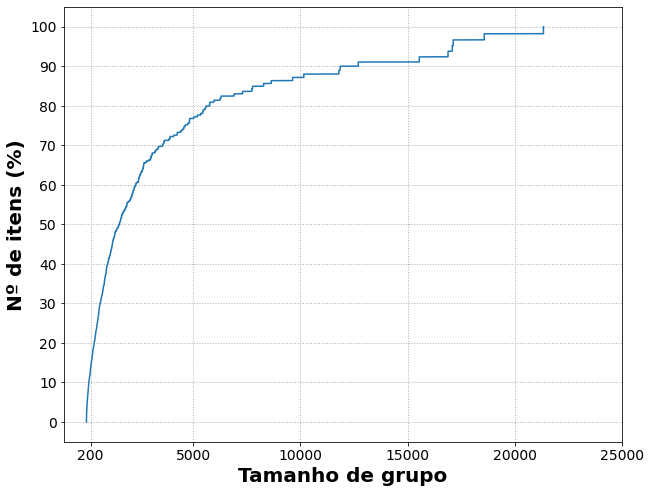

<Figure size 432x288 with 0 Axes>

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF

# fit a cdf
ecdf = ECDF(items_group_size)

fig, (axis1) = plt.subplots(figsize=(10,8))
x_label = 'Tamanho de grupo'
y_label = 'Nº de itens (%)'


# kwargs = {'cumulative': True}
# sns.distplot(vlr_recurso, hist_kws=kwargs, kde_kws=kwargs)
plt.plot(ecdf.x, ecdf.y)

axis1.set_xticks([200, 5000, 10000, 15000, 20000, 25000])
axis1.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
axis1.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

axis1.set_xlabel(x_label, fontsize=20, weight='bold')
axis1.set_ylabel(y_label, fontsize=20, weight='bold')

plt.grid(axis='both', linestyle=':', linewidth=1.0)
# axis1.legend(loc='upper right')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

plt.show()
plt.clf()

In [13]:
i = 0
for v in ecdf.x:
    if v > 30.0:
        print(100*ecdf.y[i])
        break
    i += 1

4.367787931088008


In [14]:
len(items_group_size)

1191839

In [15]:
count = 0

for size in firstt_groups_size:
    if size <= 30:
        count += 1

count

11187

In [ ]:
100*(count/len(firstt_groups_size))

In [ ]:
firstt_groups_size.count(1)

In [ ]:
firstt_groups_size.sort(reverse=True)

In [ ]:
firstt_groups_size[:10]

In [ ]:
group_sample = []
size = 2000

for group, items in first_token_groups.items():
    if len(items) >= 10000:
        group_sample.append(group)

group_sample

In [ ]:
len(first_token_groups['dipirona'])

In [ ]:
for item_id in first_token_groups['dipirona']:
    desc = ' '.join(itemlist.items_list[item_id].original_preprocessed)
    price = itemlist.items_list[item_id].price
    print(desc + '\t' + str(price))

In [ ]:
firstt_groups_names_size = groups_frequency_sort(first_token_groups)

In [ ]:
firstt_groups_names_size[:10]

In [ ]:
print_statistics(firstt_groups_size)

In [ ]:
plot_histogram(firstt_groups_size, 100, 'Nº de objetos', 'Nº de grupos', log=True)

In [ ]:
count_interval = {}
count_interval['1'] = 0
count_interval['(1,5]'] = 0
count_interval['(5,10]'] = 0
count_interval['(10,100]'] = 0
count_interval['(100,1000]'] = 0
count_interval['(1000,5000]'] = 0
count_interval['(5000,10000]'] = 0
count_interval['>10000'] = 0

In [ ]:
for p in firstt_groups_size:

    if p == 1:
        count_interval['1'] += 1
    elif p > 1 and p <= 5:
        count_interval['(1,5]'] += 1
    elif p > 5 and p <= 10:
        count_interval['(5,10]'] += 1
    elif p > 10 and p <= 100:
        count_interval['(10,100]'] += 1
    elif p > 100 and p <= 1000:
        count_interval['(100,1000]'] += 1
    elif p > 1000 and p <= 5000:
        count_interval['(1000,5000]'] += 1
    elif p > 5000 and p <= 10000:
        count_interval['(5000,10000]'] += 1
    else:
        count_interval['>10000'] += 1

In [ ]:
total = 0
lines = []
aux = 0
for interval, value in count_interval.items():
    print(interval, ':', value)
    for i in range(0, value):
        lines.append([interval])
        aux += 1
    total += value

In [ ]:
intervals_df = pd.DataFrame(lines, columns=["size"])
intervals_df.info()

In [ ]:
import seaborn as sns
sns.set_style("white")

fig, (axis1) = plt.subplots(figsize=(12,8))

sns.countplot(y="size", data=intervals_df, color='dodgerblue')

axis1.set_xlabel("Nº de grupos", fontsize=20, weight='bold')
axis1.set_ylabel("Nº de objetos", fontsize=20, weight='bold')
plt.grid(False)

total = len(intervals_df)
for p in axis1.patches:
    width = p.get_width()
    axis1.text(width, p.get_y()+0.7, '(%d)'%(width), fontsize=15)
    axis1.text(width, p.get_y()+0.4, '%.2f%%'%(100*float(width)/total), fontsize=15)

plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()
plt.clf()

# Regrouping

# Reference prices